# Passenger's preferences and external factors on ride-sharing rides. 

The `Passenger's preferences and external factors on ride-sharing rides` project was conducted to analyze the passenger preferences and the impact of external factors on rides for Zuber, a new ride-sharing company that's launching in Chicago. In the same manner, the project was used to analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

In this project, the hypothesis we tested was the whether the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

## Libraries used for analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt
from scipy import stats as st
import numpy as np

## Dataframes used for analysis

### Description of the `trips_data` dataframe 
The `trips_data` contained a total of 2 columns and 64 entries (rows). Each row describes the taxi company name and the number of trips each company did in total bewtween the dates of November 15-16 in 2017. The columns are listed and described below: 
- `company_name` : taxi company name
- `trips_amount`: the number of rides for each taxi company on November 15-16, 2017.

In [2]:
trips_data = pd.read_csv('/datasets/project_sql_result_01.csv')

In [3]:
trips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
trips_data.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


###  Description of the `dropoff_data` dataframe 
The `dropoff_data` contains a total of 2 columns and 94 entries (rows). Each row describes the name of the drop-off location as well as the average number of rides that eneded in each neighborhood in November of 2017. The columns are described below:

- `dropoff_location_name` : Chicago neighborhoods where rides ended
- `average_trips` : the average number of rides that ended in each neighborhood in November 2017.

In [5]:
dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv')

In [6]:
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
dropoff_data.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## Description of Missing Values

### `trips_data` 
The `trips_data` dataframe did not present any missing values. 

In [8]:
trips_data.isna().value_counts(normalize=True)


company_name  trips_amount
False         False           1.0
dtype: float64

### `dropoff_data` 
The `dropoff_data` dataframe did not present any missing values. 

In [9]:
dropoff_data.isna().value_counts(normalize=True)

dropoff_location_name  average_trips
False                  False            1.0
dtype: float64

## Preparing data in `trips_data` dataframe

### `trips_data` dataframe, `company_name` column
The `company_name` column had a correct data type, object. There were no values that needed correction or indicated that they were counted as two different values. 

In [10]:
trips_data.company_name.sort_values().unique()

array(['0118 - 42111 Godfrey S. Awir', '1085 - 72312 N and W Cab Co',
       '1469 - 64126 Omar Jada', '2092 - 61288 Sbeih Company',
       '2192 - 73487 Zeymane Corp', '2241 - 44667 - Felman Corp',
       '24 Seven Taxi', '2733 - 74600 Benny Jona',
       '2809 - 95474 C & D Cab Co Inc.', '2823 - 73307 Lee Express Inc',
       '3011 - 66308 JBL Cab Inc.', '303 Taxi',
       '3556 - 36214 RC Andrews Cab', '3591 - 63480 Chuks Cab',
       '3620 - 52292 David K. Cab Corp.',
       '3623 - 72222 Arrington Enterprises', '3721 - Santamaria Express',
       '4053 - 40193 Adwar H. Nikola', '4615 - 83503 Tyrone Henderson',
       '4623 - 27290 Jay Kim', '5 Star Taxi', '5006 - 39261 Salifu Bawa',
       '5062 - 34841 Sam Mestas', '5074 - 54002 Ahzmi Inc',
       '5874 - 73628 Sergey Cab Corp.', '5997 - 65283 AW Services Inc.',
       '6057 - 24657 Richard Addo', '6574 - Babylon Express Inc.',
       '6742 - 83735 Tasha Ride Inc', '6743 - 78771 Luhak Corp',
       'American United', 'American Un

### `trips_data` dataframe, `trips_amount` column
The `trips_amount` column had a correct data type, int64. 

In [11]:
trips_data.trips_amount.sort_values().unique()

array([    2,     3,     5,     7,     8,    11,    12,    13,    14,
          15,    16,    20,    21,    25,    27,    29,    31,    33,
          36,    37,    39,   127,   146,   147,   210,   230,   250,
         310,   402,   428,   978,  1014,  1259,  1296,  1404,  1486,
        1607,  1775,  1955,  2070,  2216,  2235,  3175,  3355,  4383,
        5015,  5953,  7455,  7701,  8448,  9181,  9299,  9888, 10367,
       11422, 19558])

## Preparing data in `dropoff_data` dataframe

### `dropoff_data` dataframe, `dropoff_location_name` column
The `dropoff_location_name` column had a correct data type, object. There were no values that needed correction or indicated that they were counted as two different values. 

In [12]:
dropoff_data.dropoff_location_name.sort_values().unique()

array(['Albany Park', 'Andersonville', 'Archer Heights', 'Armour Square',
       'Ashburn', 'Auburn Gresham', 'Austin', 'Avalon Park', 'Avondale',
       'Belmont Cragin', 'Beverly', 'Boystown', 'Bridgeport',
       'Brighton Park', 'Bucktown', 'Burnside', 'Calumet Heights',
       'Chatham', 'Chicago Lawn', 'Chinatown', 'Clearing', 'Douglas',
       'Dunning', 'East Side', 'East Village', 'Edgewater', 'Edison Park',
       'Englewood', 'Fuller Park', 'Gage Park', 'Garfield Park',
       'Garfield Ridge', 'Gold Coast', 'Grand Boulevard',
       'Grand Crossing', 'Grant Park', 'Hegewisch', 'Hermosa',
       'Humboldt Park', 'Hyde Park', 'Irving Park', 'Jackson Park',
       'Jefferson Park', 'Kenwood', 'Lake View', 'Lincoln Park',
       'Lincoln Square', 'Little Italy, UIC', 'Little Village',
       'Logan Square', 'Loop', 'Lower West Side', 'Mckinley Park',
       'Montclare', 'Morgan Park', 'Mount Greenwood', 'Museum Campus',
       'Near South Side', 'New City', 'North Center', 'Nor

### `dropoff_data` dataframe, `average_trips` column
The `average_trips` column had a correct data type, float64. The number of decimal placements was rounded to the nearest tenth of decimal.  

In [13]:
dropoff_data.average_trips.sort_values().unique()

array([1.80000000e+00, 1.96153846e+00, 2.33333333e+00, 3.11764706e+00,
       3.13793103e+00, 3.80000000e+00, 3.89655172e+00, 5.66666667e+00,
       5.76666667e+00, 6.46666667e+00, 6.96666667e+00, 7.50000000e+00,
       7.70000000e+00, 7.73333333e+00, 8.16666667e+00, 8.23333333e+00,
       8.36666667e+00, 9.13333333e+00, 9.56666667e+00, 1.05000000e+01,
       1.22666667e+01, 1.30000000e+01, 1.41666667e+01, 1.42333333e+01,
       1.43666667e+01, 1.45000000e+01, 1.51666667e+01, 1.60333333e+01,
       1.61333333e+01, 1.66333333e+01, 1.68666667e+01, 1.94666667e+01,
       2.26000000e+01, 2.29333333e+01, 2.32000000e+01, 2.54333333e+01,
       2.75666667e+01, 2.76000000e+01, 3.01666667e+01, 3.21666667e+01,
       3.31034483e+01, 3.38000000e+01, 3.61666667e+01, 4.05333333e+01,
       4.35666667e+01, 4.44333333e+01, 5.16000000e+01, 5.24333333e+01,
       5.39666667e+01, 5.90333333e+01, 6.40333333e+01, 6.57666667e+01,
       6.78333333e+01, 7.43000000e+01, 7.43333333e+01, 7.70333333e+01,
      

In [14]:
dropoff_data['average_trips']=round(dropoff_data.average_trips,1)
dropoff_data.average_trips.head(10)

0    10727.5
1     9523.7
2     6664.7
3     5163.7
4     2546.9
5     2421.0
6     2068.5
7     1510.0
8     1364.2
9     1259.8
Name: average_trips, dtype: float64

# Removing duplicates in dataframes 

## Removing duplicates in `trips_data`

There were no duplicates in the `trips_data` dataframe. 

In [15]:
trips_data.duplicated().value_counts(normalize=True)

False    1.0
dtype: float64

## Removing duplicates in `dropoff_data`
There were no duplcates in the `dropoff_data` dataframe. 

In [16]:
dropoff_data.duplicated().value_counts(normalize=True)

False    1.0
dtype: float64

# Analyzing the data

## Top 10 neighborhoods in terms of amount of dropoffs
In this section, we analyzed the top 10 neighborhoods with the highest number of dropoffs, on average. We the list in ascending order is depicted in __top_10_neigh__ table and plot below. Based on the distribution, we found that the top 10 neighborhoods had an average amount of 4,325 trips on average; a median value of 2,483 trips on average; a standard deviaration value of 3,530 trips; and maximum and minimum values of 10,727 and 1,259 trips, respectively. The boxplot of __top_10_neigh__ showed that there was a positive distribution, and no outliers greather than 1.5*IQR.

In [17]:
top_10_neigh=dropoff_data.sort_values('average_trips', ascending=False).head(10)
print(top_10_neigh.describe())
top_10_neigh


       average_trips
count      10.000000
mean     4325.000000
std      3530.199275
min      1259.800000
25%      1649.625000
50%      2483.950000
75%      6289.450000
max     10727.500000


,dropoff_location_name,average_trips
0,Loop,10727.5
1,River North,9523.7
2,Streeterville,6664.7
3,West Loop,5163.7
4,O'Hare,2546.9
5,Lake View,2421.0
6,Grant Park,2068.5
7,Museum Campus,1510.0
8,Gold Coast,1364.2
9,Sheffield & DePaul,1259.8


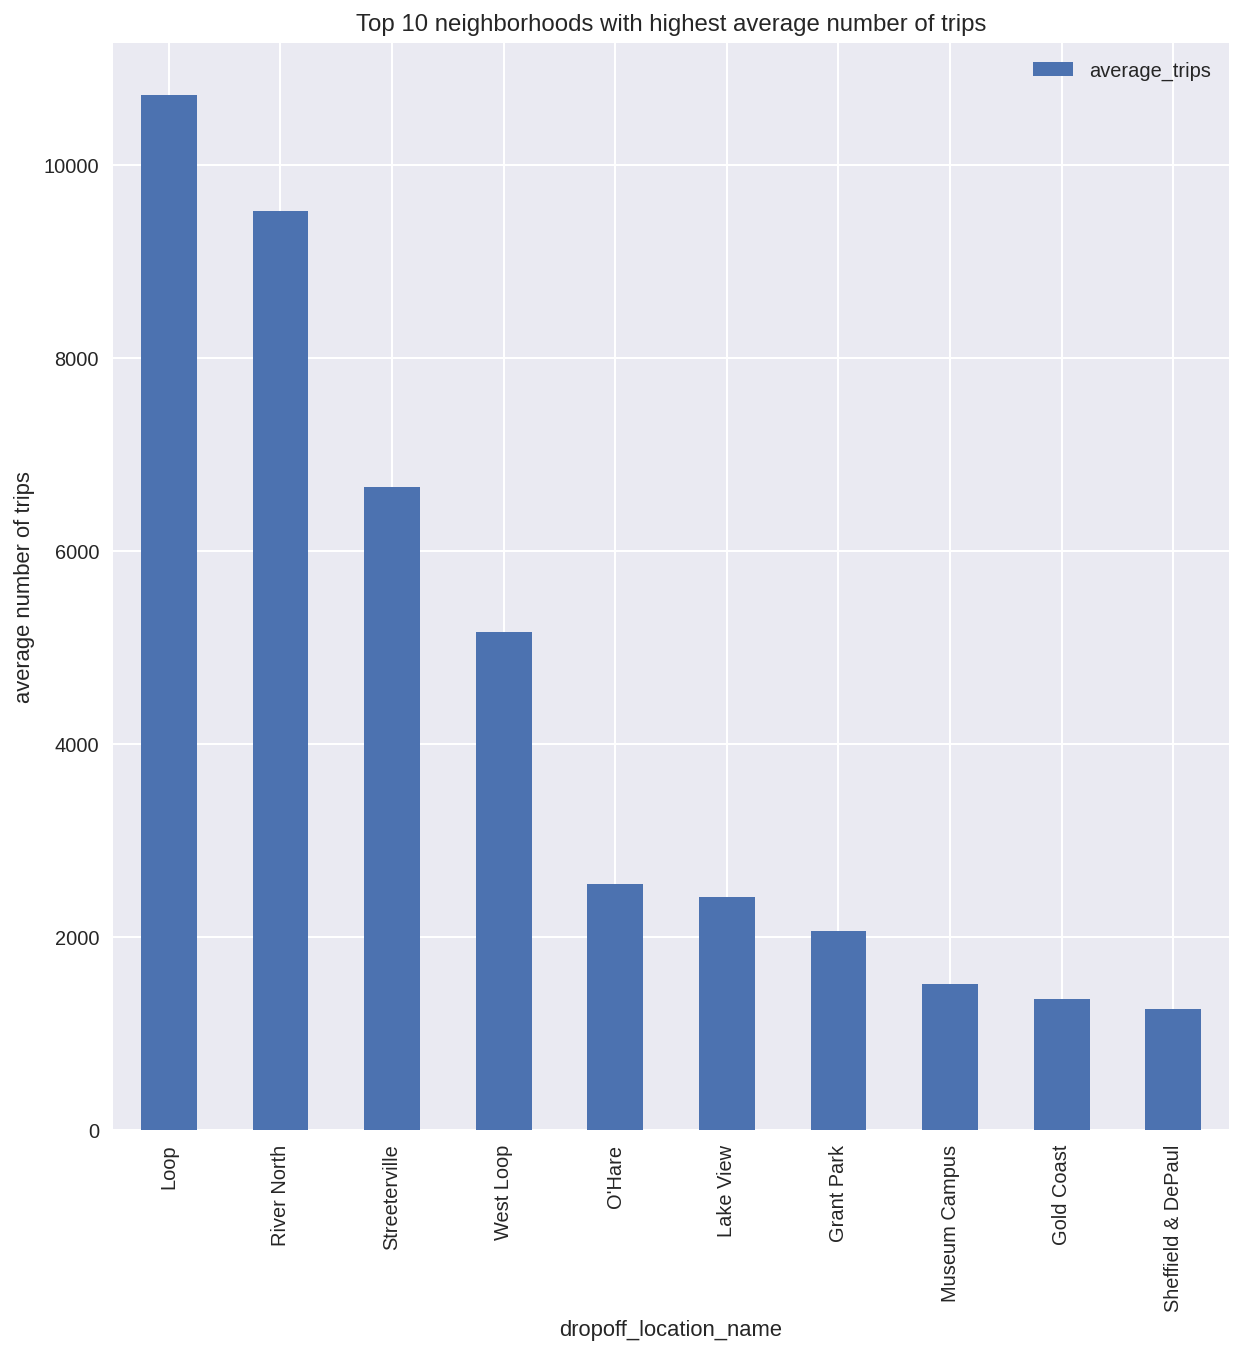

In [18]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')
top_10_neigh.plot(kind='bar', x='dropoff_location_name', y='average_trips', figsize=(10,10))
plt.ylabel('average number of trips')
plt.title('Top 10 neighborhoods with highest average number of trips')
plt.show()

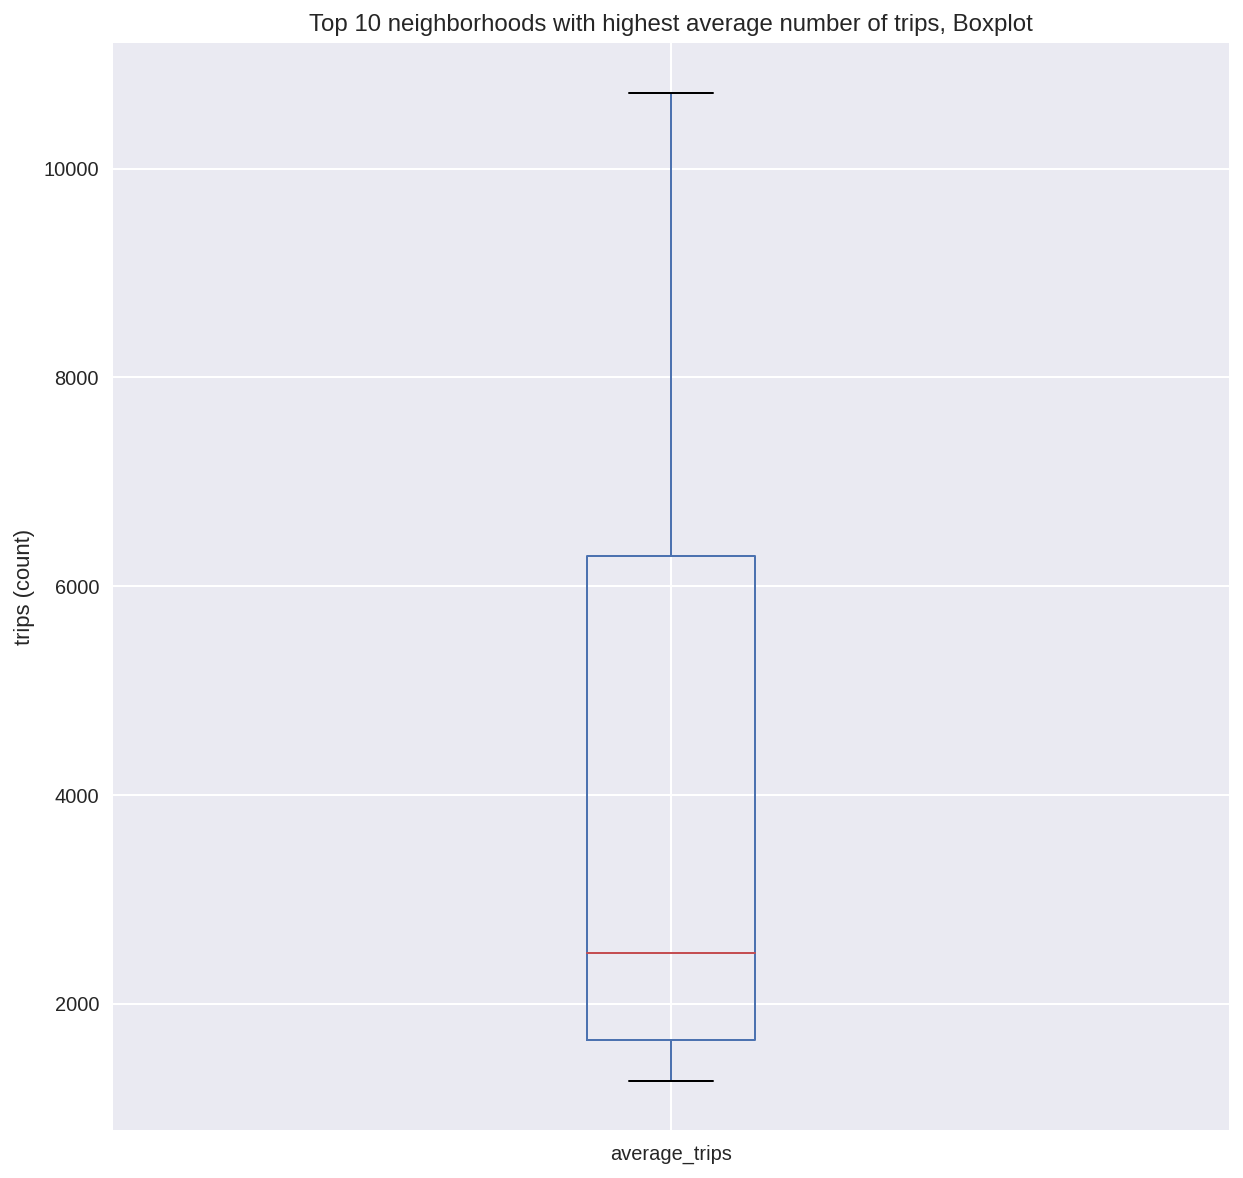

In [19]:
top_10_neigh.plot(kind='box', figsize=(10,10))
plt.ylabel('trips (count)')
plt.title('Top 10 neighborhoods with highest average number of trips, Boxplot')
plt.show()

## Distribution of number of rides per taxi company
In this section, we analyzed the distribution of number of rides per taxi company. Below is a boxplot depicting the distribution. For the trips amount, we noted that there were outliers greather than 1.5*IQR, and the distribution was postively skewed. The distribution for the trips amount for taxi companies presented a mean value of 2,145.48 trips, with a standard deviation of 3,812.31 trips; a median value of 178.50 trips; and maximim and minimum values of 19,558.00 and 2.00 trips, respectively. 

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


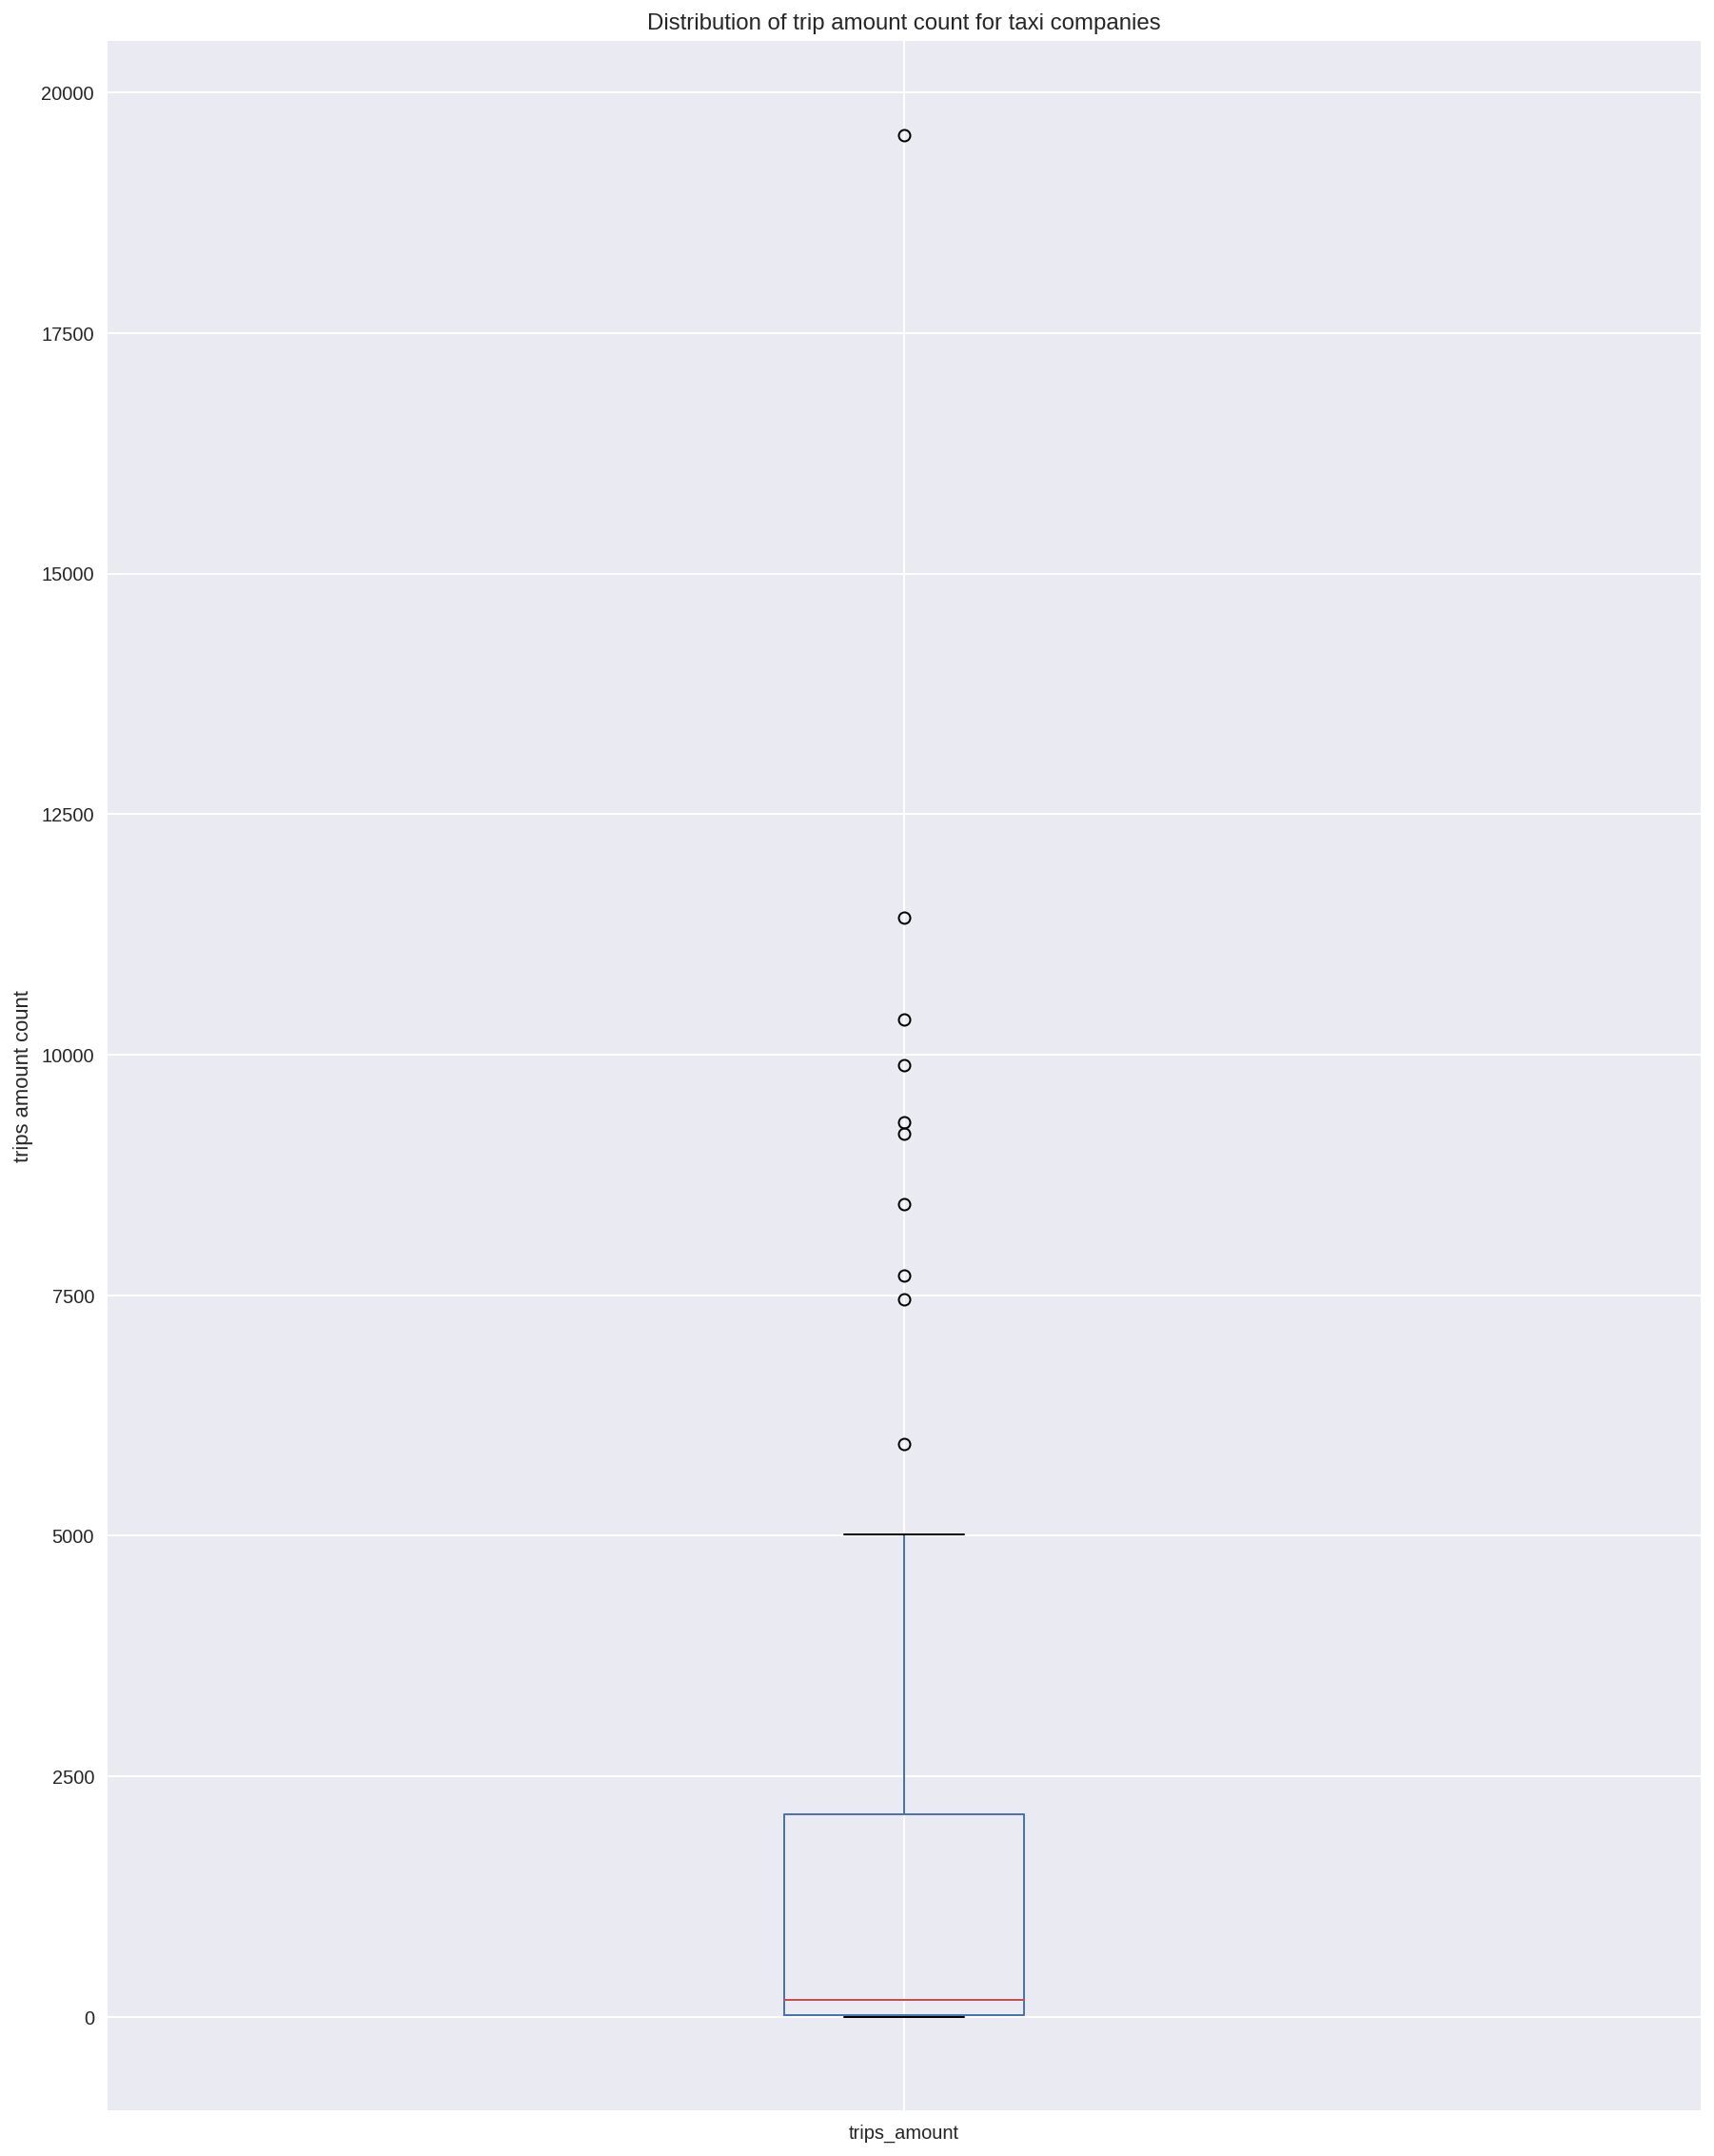

In [20]:
print(trips_data.describe())
trips_data.plot(kind='box', figsize=(15,20))
plt.ylabel('trips amount count')
plt.title('Distribution of trip amount count for taxi companies')
plt.show()

Below is the list of the taxi companies that were within 1.5*IQR, and were not outliers in the distribution. The `trips_data_not_outliers` bar plot depicts the distribution of the companies that were within 1.5*IQR. From the distribution with no ouliers, we concluded that the distrubution presented a mean value of 704.4 trips; a median value of 36.5 trips; and a standard deviation of 1171.6 trips. The distribution remained postively skewed. 

In [21]:
iqr=trips_data.trips_amount.quantile(0.75)-trips_data.trips_amount.quantile(0.25)
upper_limit= trips_data.trips_amount.quantile(0.75) + 1.5*iqr

trips_data.query('trips_amount<= @upper_limit')

,company_name,trips_amount
10,Choice Taxi Association,5015
11,Globe Taxi,4383
12,Dispatch Taxi Affiliation,3355
13,Nova Taxi Affiliation Llc,3175
14,Patriot Taxi Dba Peace Taxi Association,2235
15,Checker Taxi Affiliation,2216
16,Blue Diamond,2070
17,Chicago Medallion Management,1955
18,24 Seven Taxi,1775
19,Chicago Medallion Leasing INC,1607


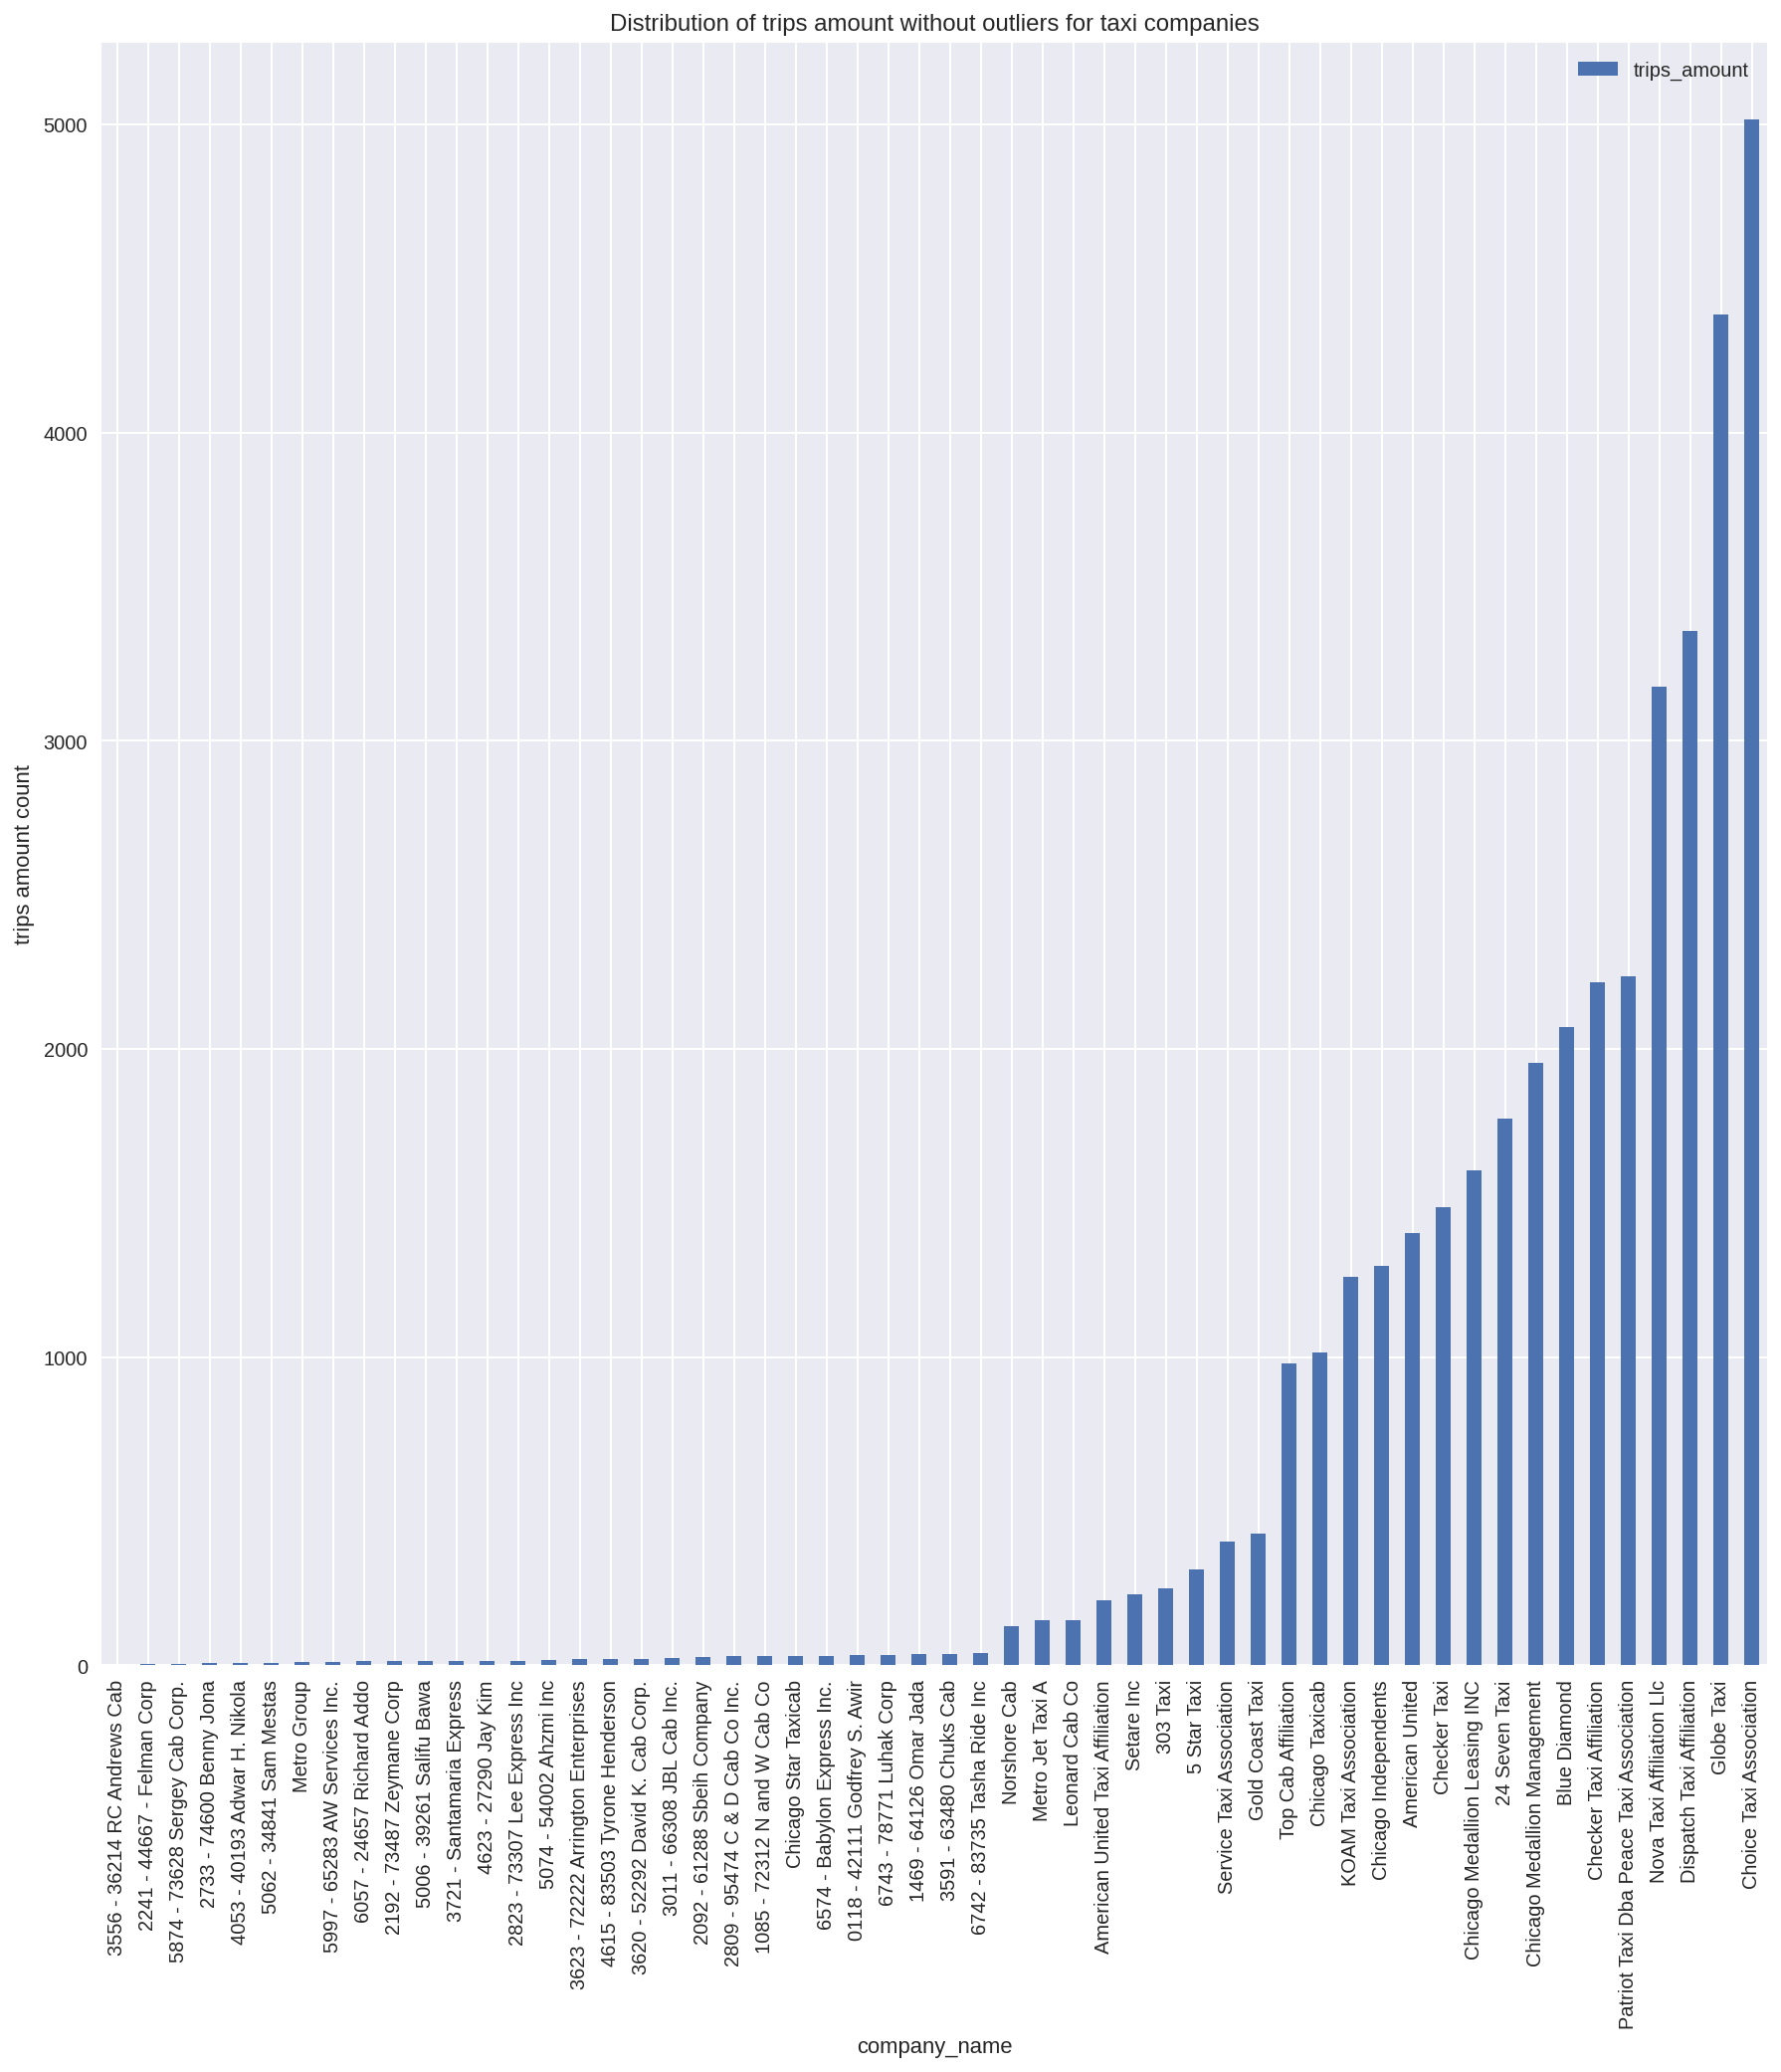

,trips_amount
count,54.000000
mean,704.425926
std,1171.601301
min,2.000000
25%,15.250000
50%,36.500000
75%,1197.750000
max,5015.000000


In [22]:
iqr=trips_data.trips_amount.quantile(0.75)-trips_data.trips_amount.quantile(0.25)
upper_limit= trips_data.trips_amount.quantile(0.75) + 1.5*iqr

trips_data_not_outliers=trips_data.query('trips_amount<=@upper_limit')
trips_data_not_outliers.sort_values('trips_amount').plot(kind='bar', x='company_name',y='trips_amount', figsize=(15,15))
plt.ylabel('trips amount count')
plt.title('Distribution of trips amount without outliers for taxi companies')
plt.show()
trips_data_not_outliers.describe()

In this section, we depected the values that were outliers, or greater than 1.5*IQR in the distrubution of trips amount for taxi companies. From the distribution, we concluded that this destribution presented a mean value of 9,927.2 trips; a median value of 9240.00 trips, and a standard deviation of 3729.5 trips. The distribution was positively skewed. 

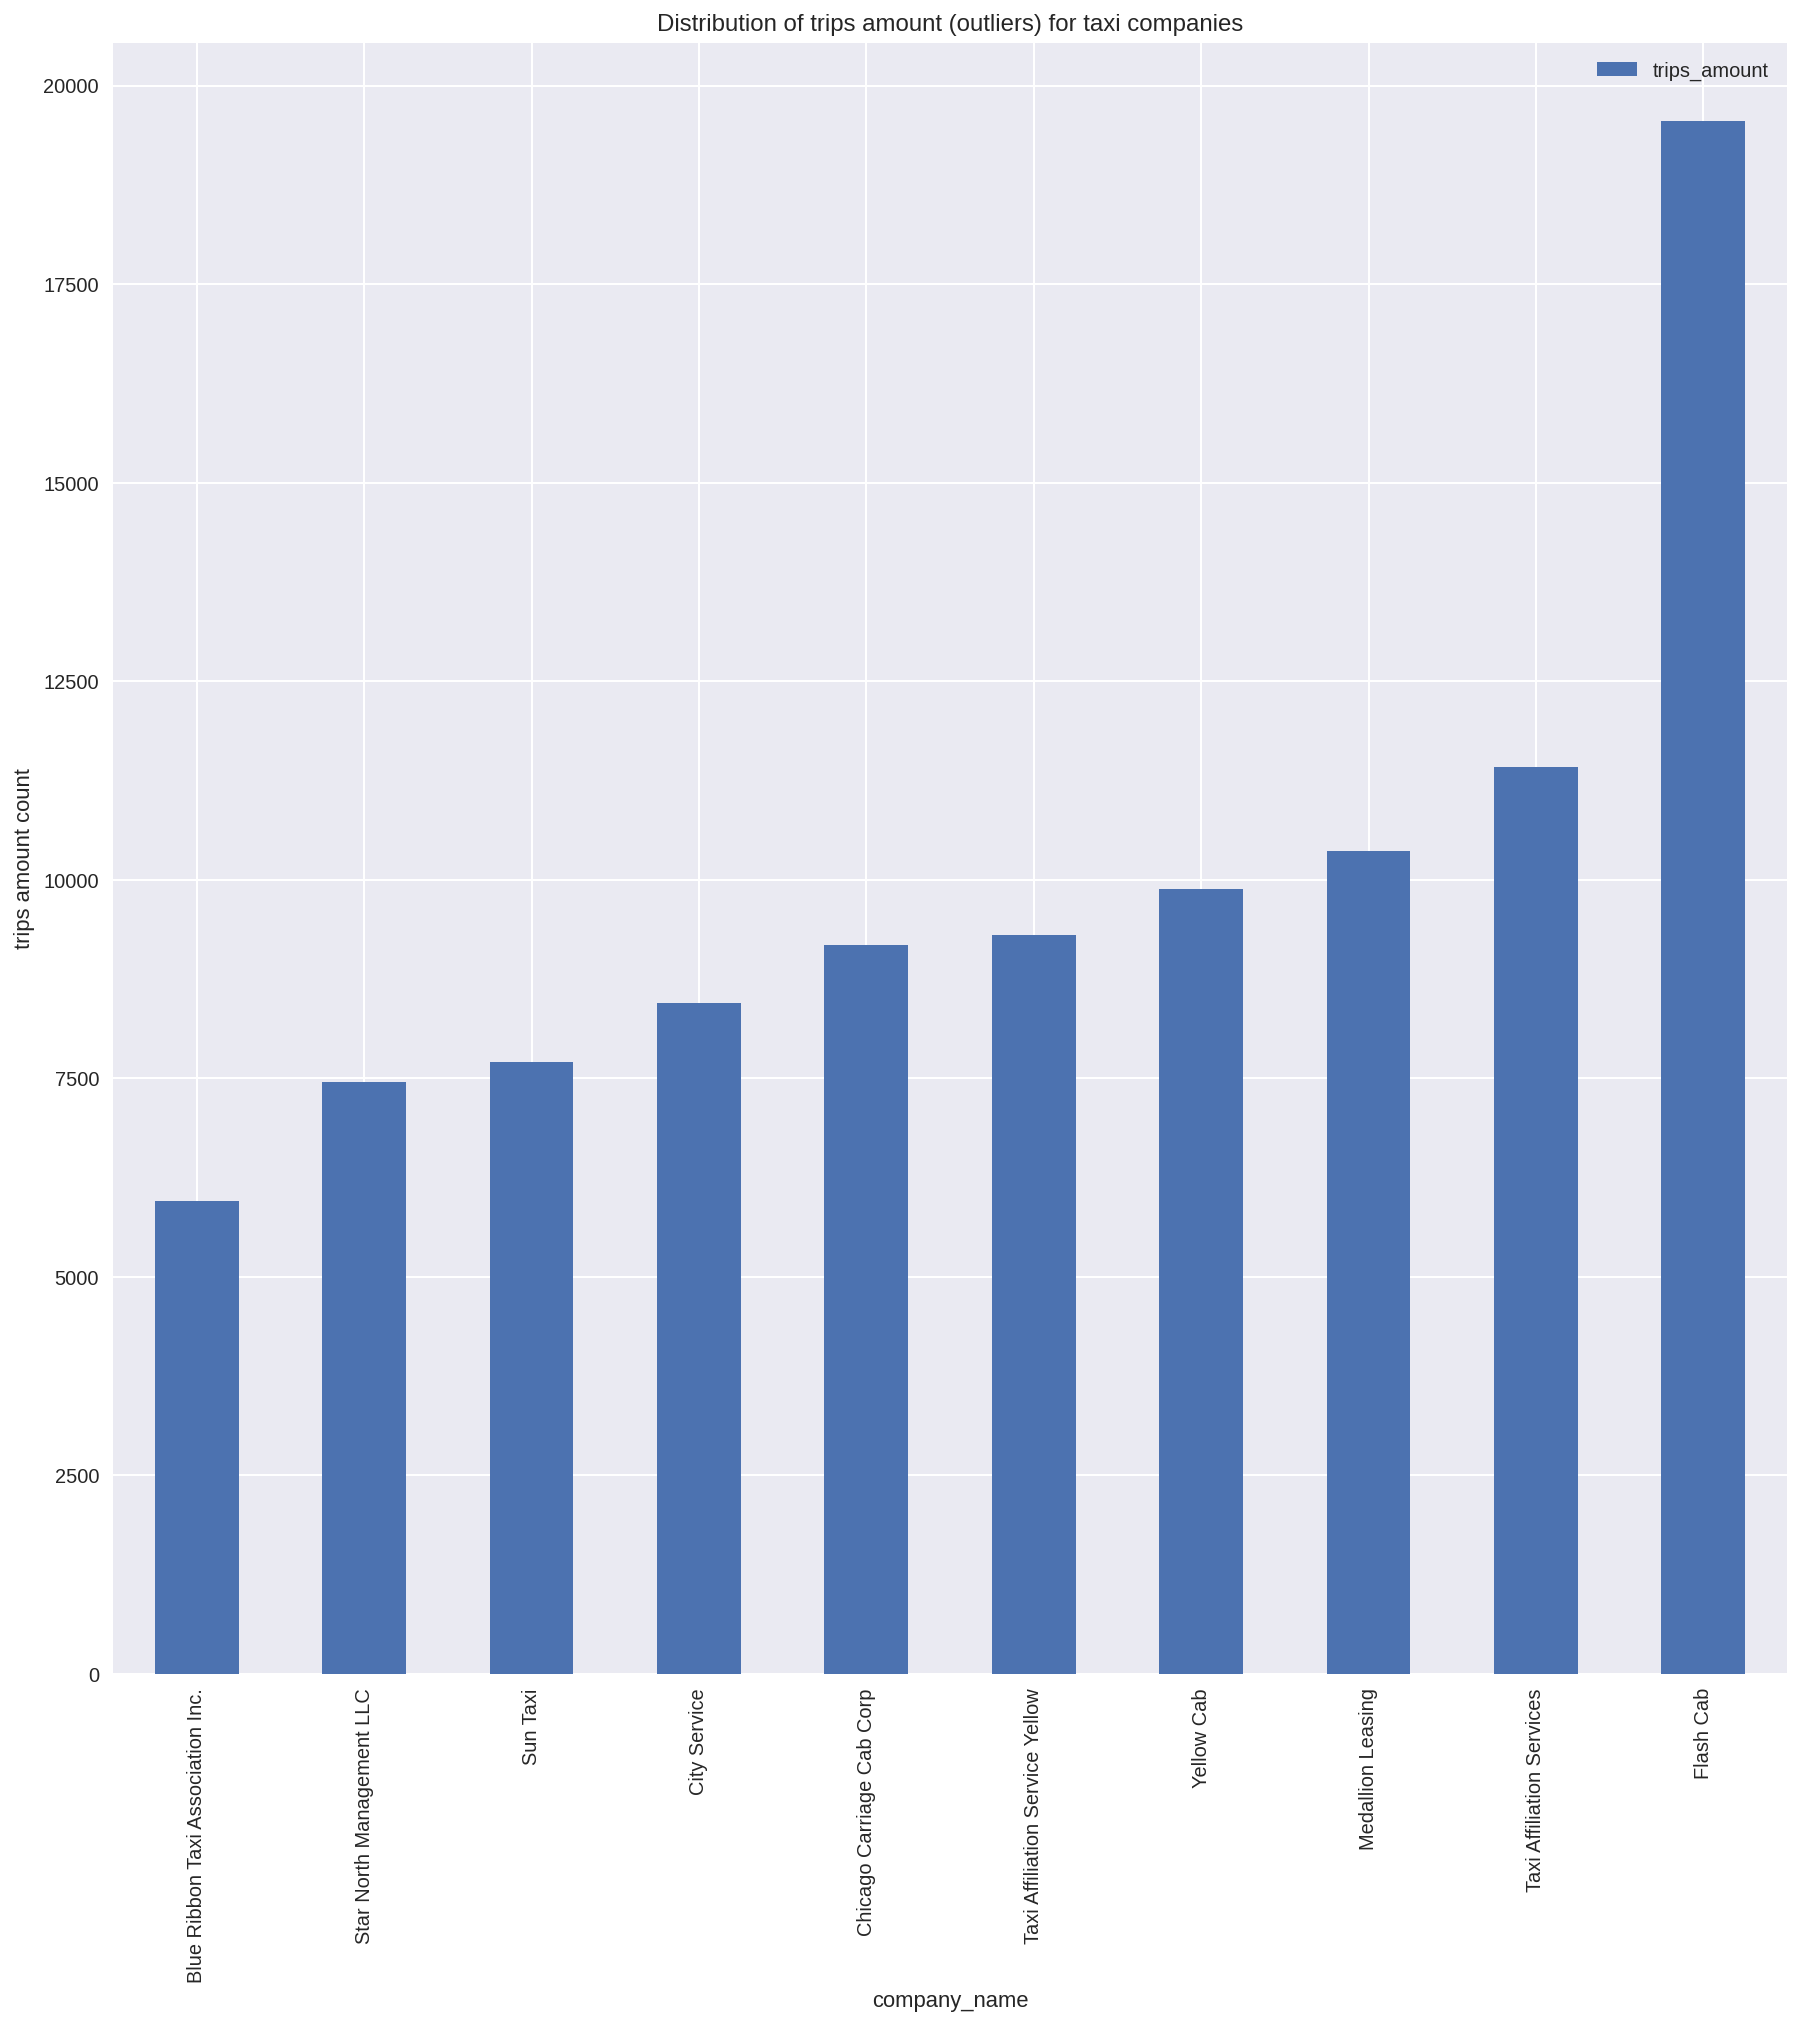

,trips_amount
count,10.000000
mean,9927.200000
std,3729.509703
min,5953.000000
25%,7887.750000
50%,9240.000000
75%,10247.250000
max,19558.000000


In [23]:
trips_data_outliers=trips_data.query('trips_amount>@upper_limit')
trips_data_outliers.sort_values('trips_amount').plot(kind='bar', x='company_name',y='trips_amount', figsize=(15,15))
plt.ylabel('trips amount count')
plt.title('Distribution of trips amount (outliers) for taxi companies')
plt.show()
trips_data_outliers.describe()

To observe the percentage distribution from the total amount of trips, we grouped the companies that were below the 60 percentile of the distribution as __other__ for company name. The pie chart from the `trips_pivot` table depicts the percentage distribution of total trips amounts, and the companies with trips amounts less than 60 quantile replaced name as __other__. 

In [24]:
all_trips_data= trips_data

def company_naming(row):
    company_name=row['company_name']
    trips_amount=row['trips_amount']
    median= trips_data.trips_amount.quantile(0.6)
    
    if trips_amount < median: 
        return 'other'
    if trips_amount >= median:
        return company_name

        
all_trips_data['company_name']=all_trips_data.apply(company_naming, axis=1)
all_trips_data.query('company_name=="other"')


,company_name,trips_amount
26,other,428
27,other,402
28,other,310
29,other,250
30,other,230
31,other,210
32,other,147
33,other,146
34,other,127
35,other,39


In [25]:
trips_pivot=all_trips_data.pivot_table(index='company_name', values='trips_amount', aggfunc='sum')
trips_pivot.columns=['trips_amount']
trips_pivot.sort_values('trips_amount', ascending=False)


,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasing,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


From the distribution in the `trips_pivot` we concluded that the top 3 companies that presented the highest number of trip amounts were Flash Cab, Taxi Affiliation Services, and Medallion Leasing with trip amount values of 19558, 11422, and 10367 trips, respectively. 

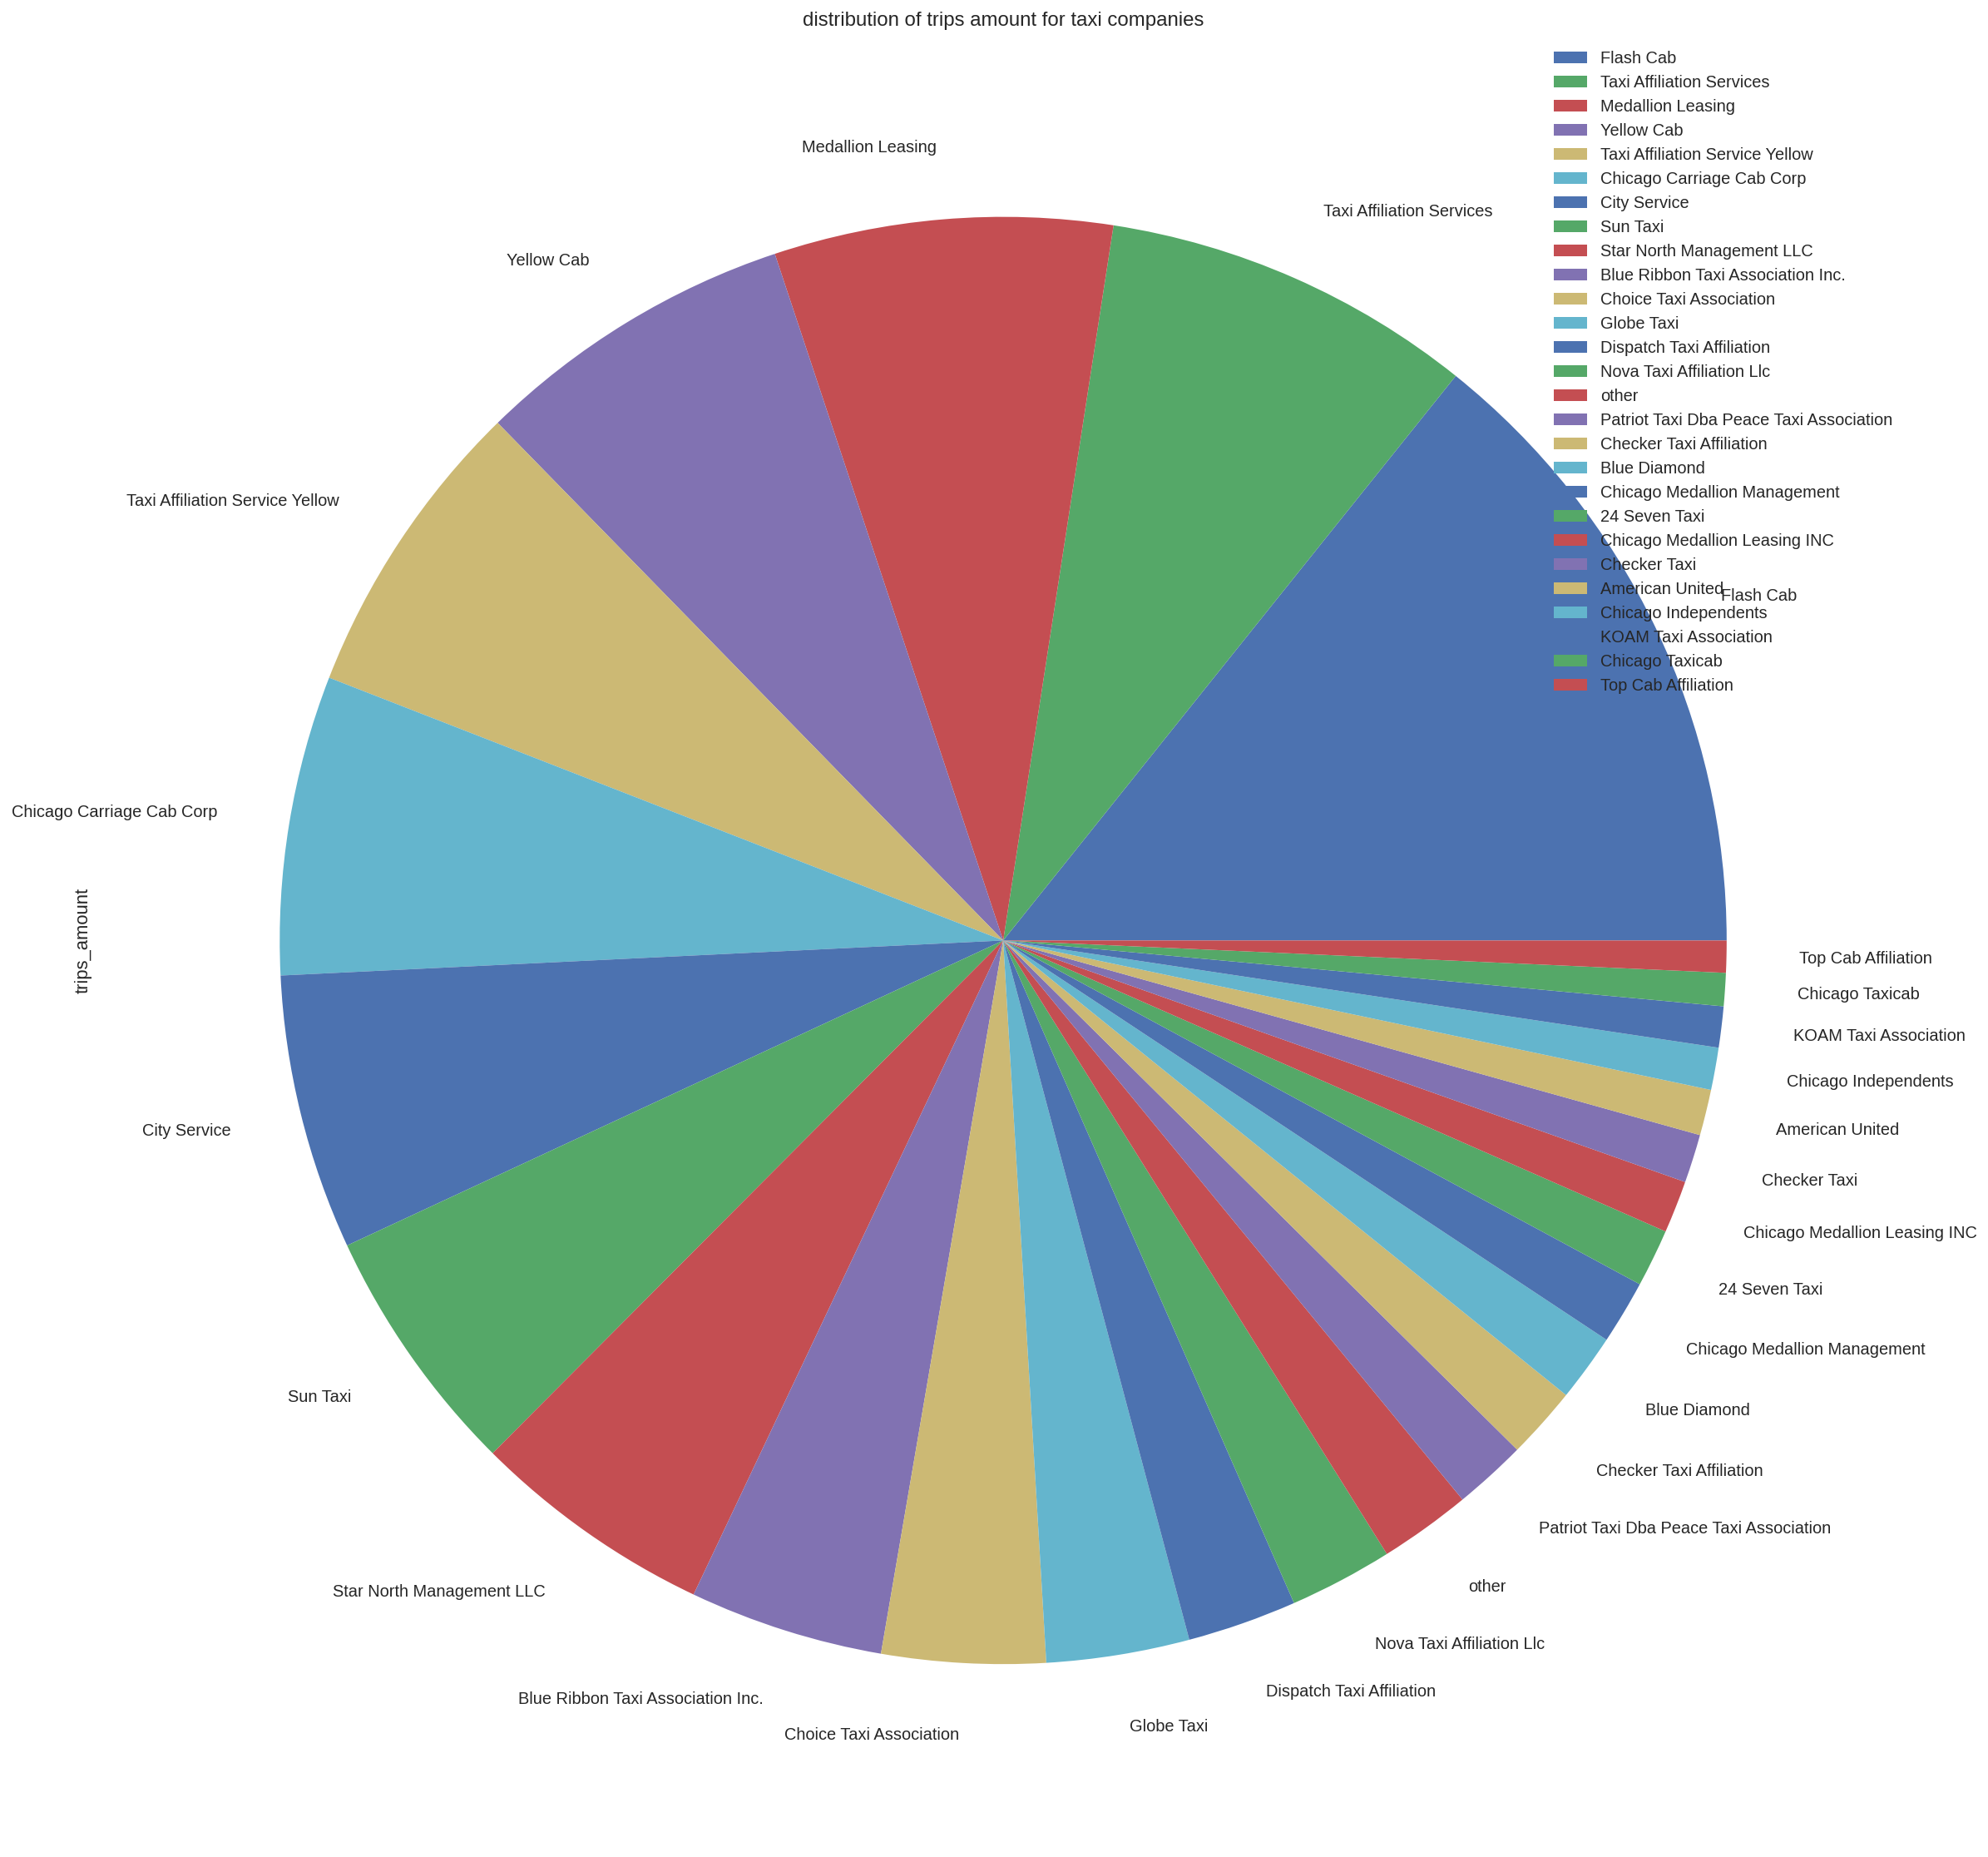

In [26]:
trips_pivot.sort_values('trips_amount', ascending=False,).plot(kind='pie', y='trips_amount', figsize=(20,20))
plt.title('distribution of trips amount for taxi companies')
plt.show()


## Testing Hypotheses

The `loop_to_airport` file contains data on rides from the Loop to O'Hare International Airport. The dates were selected on Saturday in 2017. Below is a description of the columns: 
- `start_ts`: pickup date and time
- `weather_conditions`: weather conditions at the moment the ride started
- `duration_seconds`: ride duration in seconds

Since the file does not contain any missing values. The only step to prepare the data was to change the columns to correct datatype. 

In [27]:
loop_to_airport = pd.read_csv('/datasets/project_sql_result_07.csv')
loop_to_airport.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [28]:
loop_to_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


### Changing datatype in columns for `loop_to_airport` dataframe 

#### `start_ts` columns to datetime64[ns]

In [29]:
loop_to_airport['start_ts']=loop_to_airport['start_ts'].astype('datetime64[ns]')

In [30]:
#checking the datatype in columns 
print(loop_to_airport.head())
loop_to_airport.info()

             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


### Hypothesis 
In this section, we tested the following hypotheses: 
- __H0__: There is no difference between the average duration of rides from the Loop to O'Hare International Airport, on Saturdays, where the weather conditions were `Bad`, and the average duration of rides, on Saturdays, where the weather conditions were `Good`. 
- __H1__:  The average duration of rides from the Loop to O'Hare International Airport, on Saturdays, where the weather conditions were `Bad`, is larger than the average duration of rides, on Saturdays, where the weather conditions were `Good`. 

The hypotheses were tested on 95% confidence. Based on the t-test, we conclude that we  rejected the null hypothesis on 95% statistical confidence and conclude that we  have enough evidence to conclude that the average duration from the Loop to O'Hare International Airport, on Saturdays, where the weather conditions were `Bad`, is statistically larger than the average duration of rides, on Saturdays, where the weather conditions were `Good`.

In this section, we analyzed the vararainces from both, saturdays with __good__ and __bad__ weather description. We did not consider the variances to be equal for both data groups. 

In [31]:
#checking for variance
good_saturdays=loop_to_airport.query('weather_conditions =="Good"')['duration_seconds'].to_list()
bad_saturdays=loop_to_airport.query('weather_conditions =="Bad"')['duration_seconds'].to_list()

good_variance=np.var(good_saturdays)
print(good_variance)
bad_variance=np.var(bad_saturdays)
bad_variance

575732.9308497686


517403.56330246915

In [33]:
#testing hypothesis
good_mean=loop_to_airport.query('weather_conditions =="Good"')['duration_seconds'].mean()
bad_mean=loop_to_airport.query('weather_conditions =="Bad"')['duration_seconds'].mean()

alpha=0.05

results=st.ttest_ind(good_saturdays, bad_saturdays, equal_var = False)
p_value= results.pvalue

print (p_value)

if results.pvalue < alpha and bad_mean > good_mean:
    print ('we reject the null')
else:
    print ('we cannot reject the null')

6.738994326108734e-12
we reject the null


## General Conclusion 

We concluded that the top 10 neightboorhoods with the highest numbers of dropoff were airport Loop, River North, Streeterville, 
West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul, with dropoff means of 10727.5, 9523.7, 6664.7, 5163.7, 2546.9, 2421.0, 2068.5, 1510.0, 1364.2, and 1259.8, respectively. Similarly, we concluded that the taxi companies with the highest number of trip amounts were Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, and 
Taxi Affiliation Service Yellow, with trip amounts of 19558, 11422, 10367, 9888, 9299, respectively. Lastly, we concluded that we had enough evidence to conclude that trip durations on saturdays, with weather conditions catergorized as __bad__, were, on average, statistically larger than trip durations on saturdays, with weather conditions catergorized as __good__.